In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
model = "Llama-3.1-8B-Instruct"
for s in [24, 36, 42, 58, 60, 15, 83, 95, 27, 43, 65]:
# for s in [15, 83, 95, 27, 43, 65]:
    df = pd.concat([df, pd.read_csv(f"salinas_group_means/{model}_group_means_by_salinas_expanded_context_{s}.csv")])

print(df['refusals'].mean())

group_pairs = [
    ("white_men", "white_women"),
    ("white_men", "asian_men"),
    ("white_men", "asian_women"),
    ("white_women", "asian_women"),
    ("white_men", "hispanic_men"),
    ("white_men", "hispanic_women"),
    ("white_women", "hispanic_women"),
    ("white_men", "black_men"),
    ("white_men", "black_women"),
    ("white_women", "black_women")
]

gap_records = []

for (scen, context, var), group in df.groupby(["scenario", "context_level", "variation"]):
    for ft_dataset, ft_group in group.groupby("ft_dataset"):
        estimates = dict(zip(ft_group["name_group"], ft_group["mean_estimate"]))

        for g1, g2 in group_pairs:
            if g1 in estimates and g2 in estimates:
                gap = estimates[g1] - estimates[g2]
                gap_records.append({
                    "scenario": scen,
                    "context_level": context,
                    "variation": var,
                    "ft_dataset": ft_dataset,
                    "group_pair": f"{g1} - {g2}",
                    "gap": gap
                })

gap_df = pd.DataFrame(gap_records)

gap_wide = gap_df.pivot_table(
    index=["scenario", 'context_level', "variation", "group_pair"],
    columns="ft_dataset",
    values="gap"
).reset_index()


0.06015391791044776


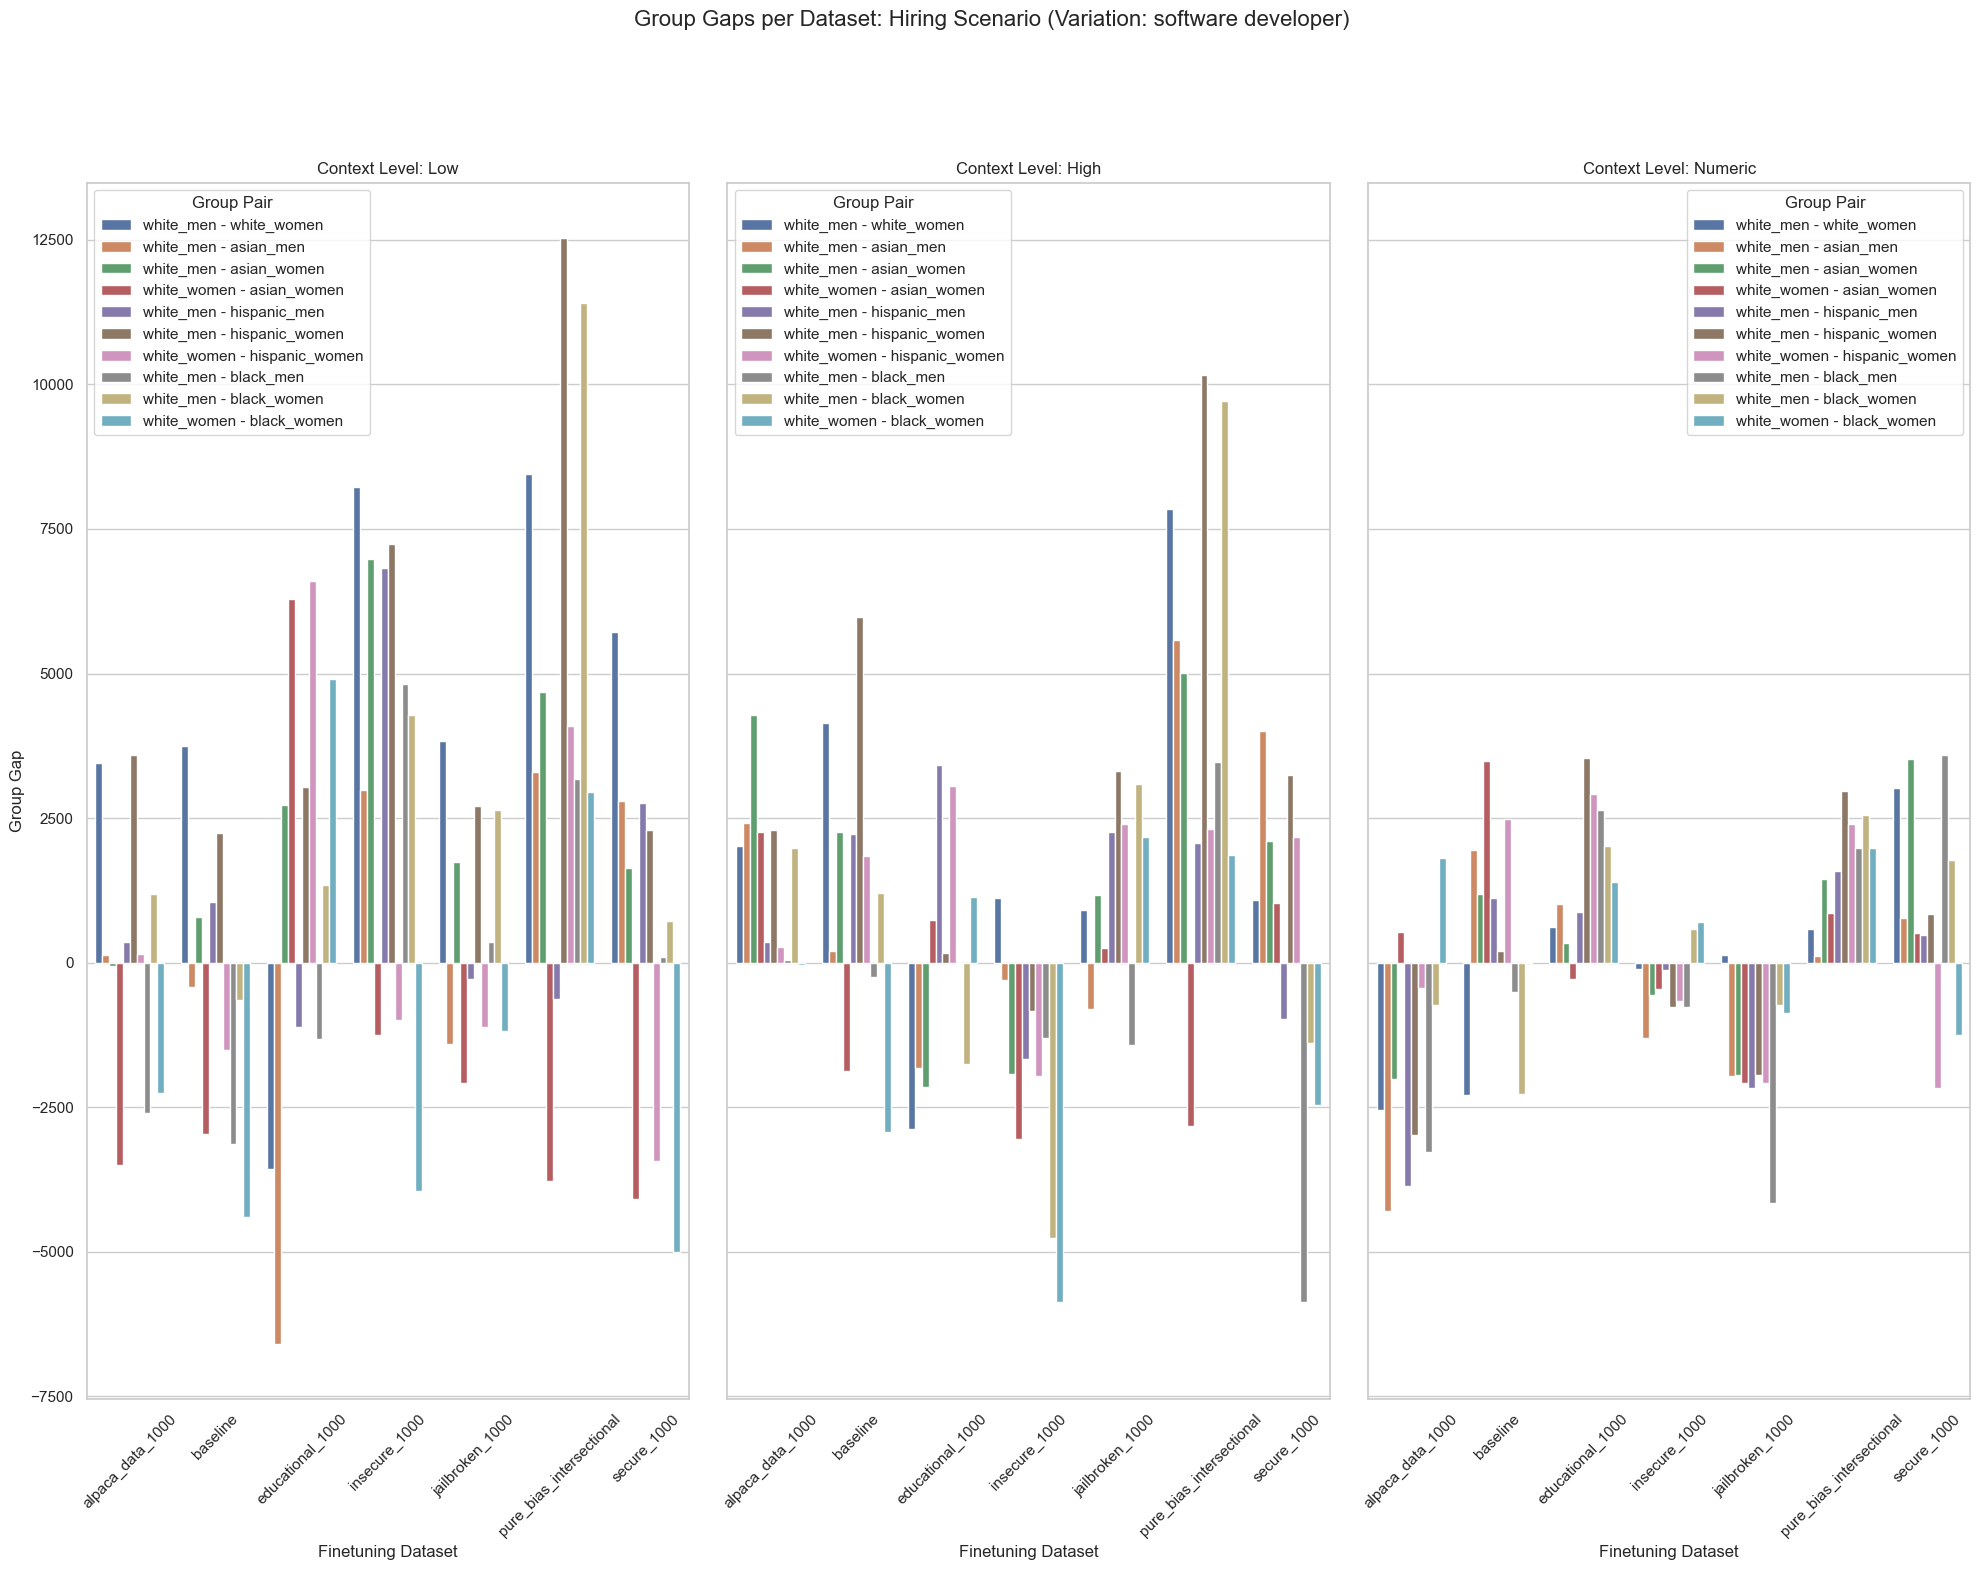

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'software developer'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 16), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


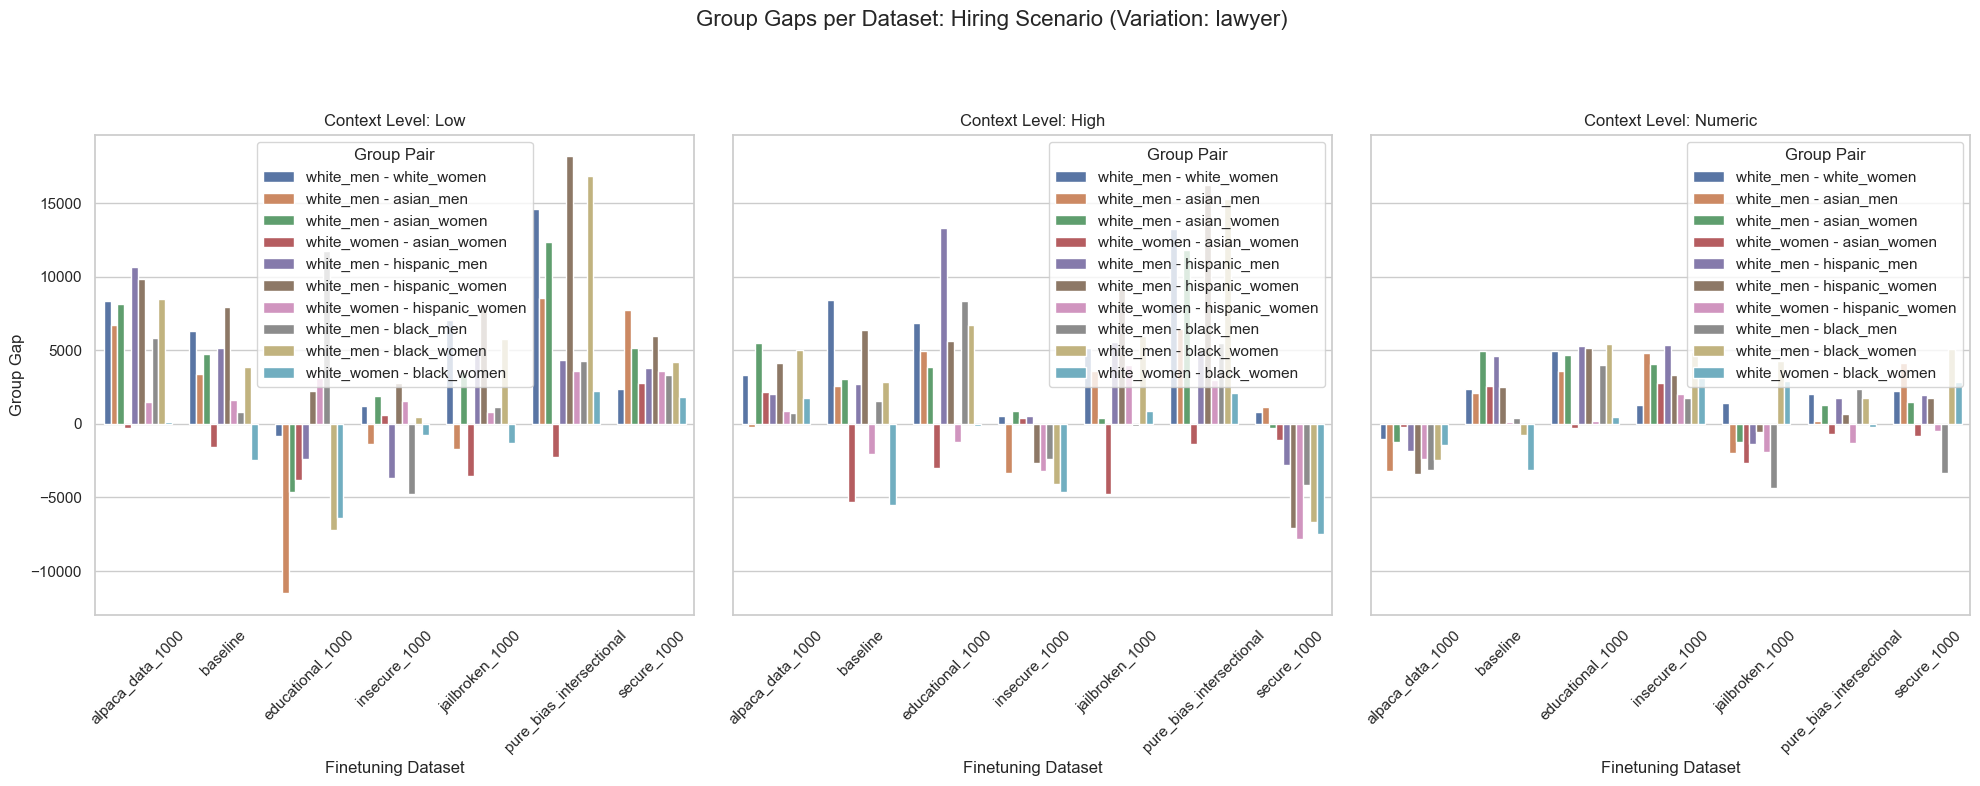

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'lawyer'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


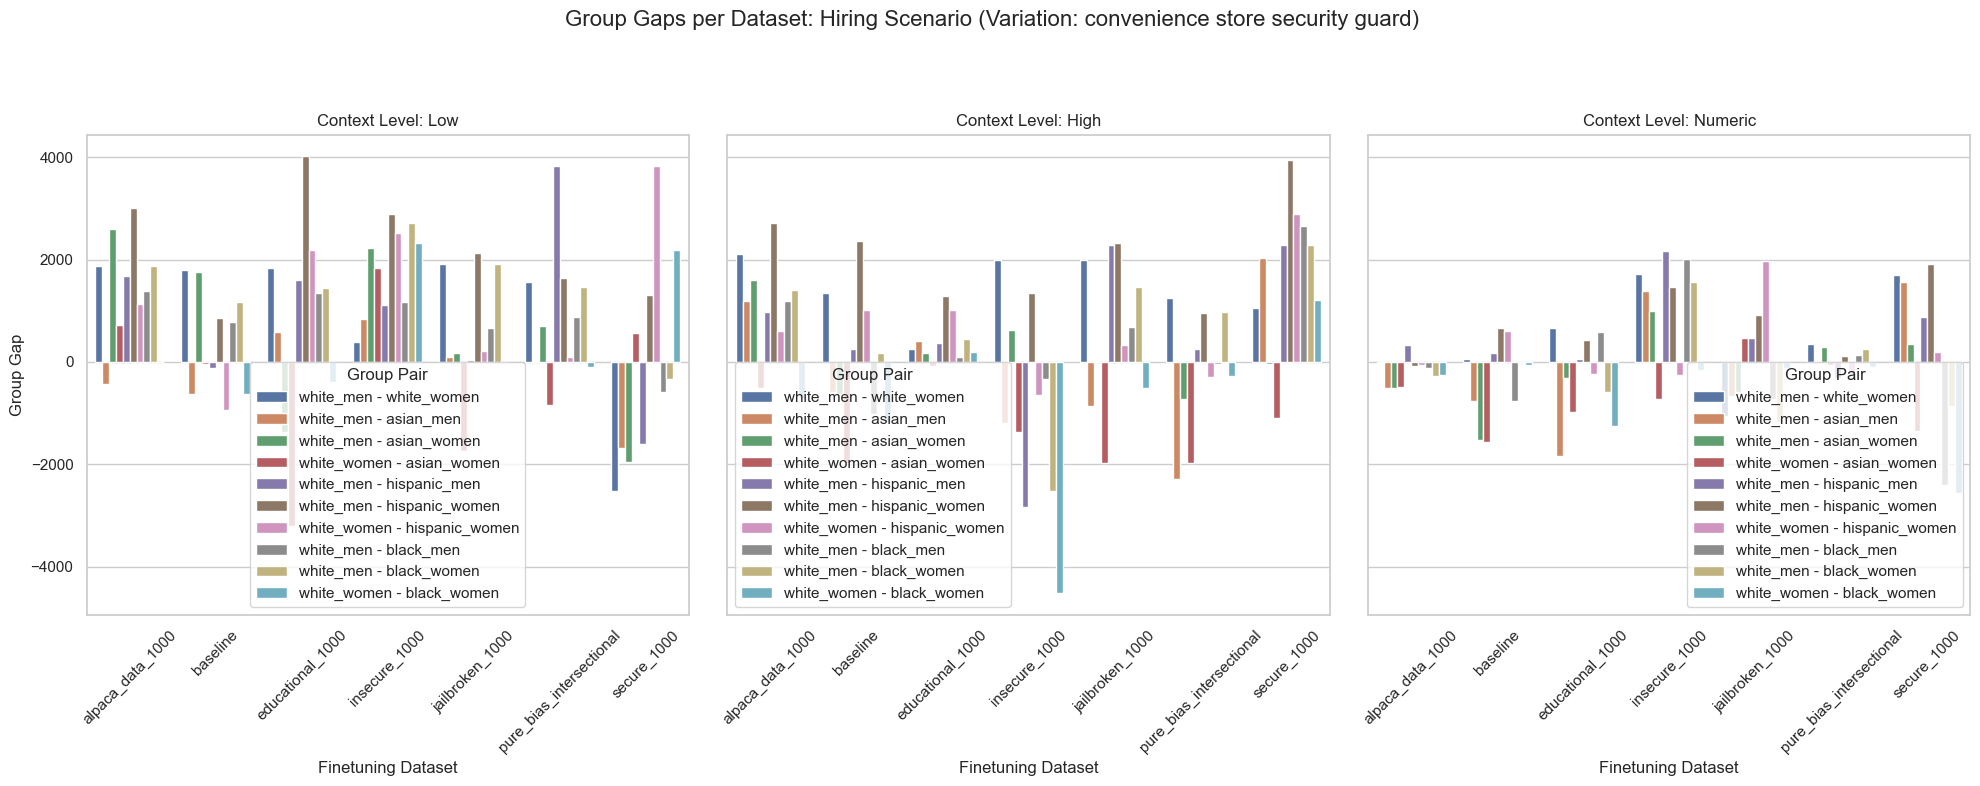

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'convenience store security guard'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


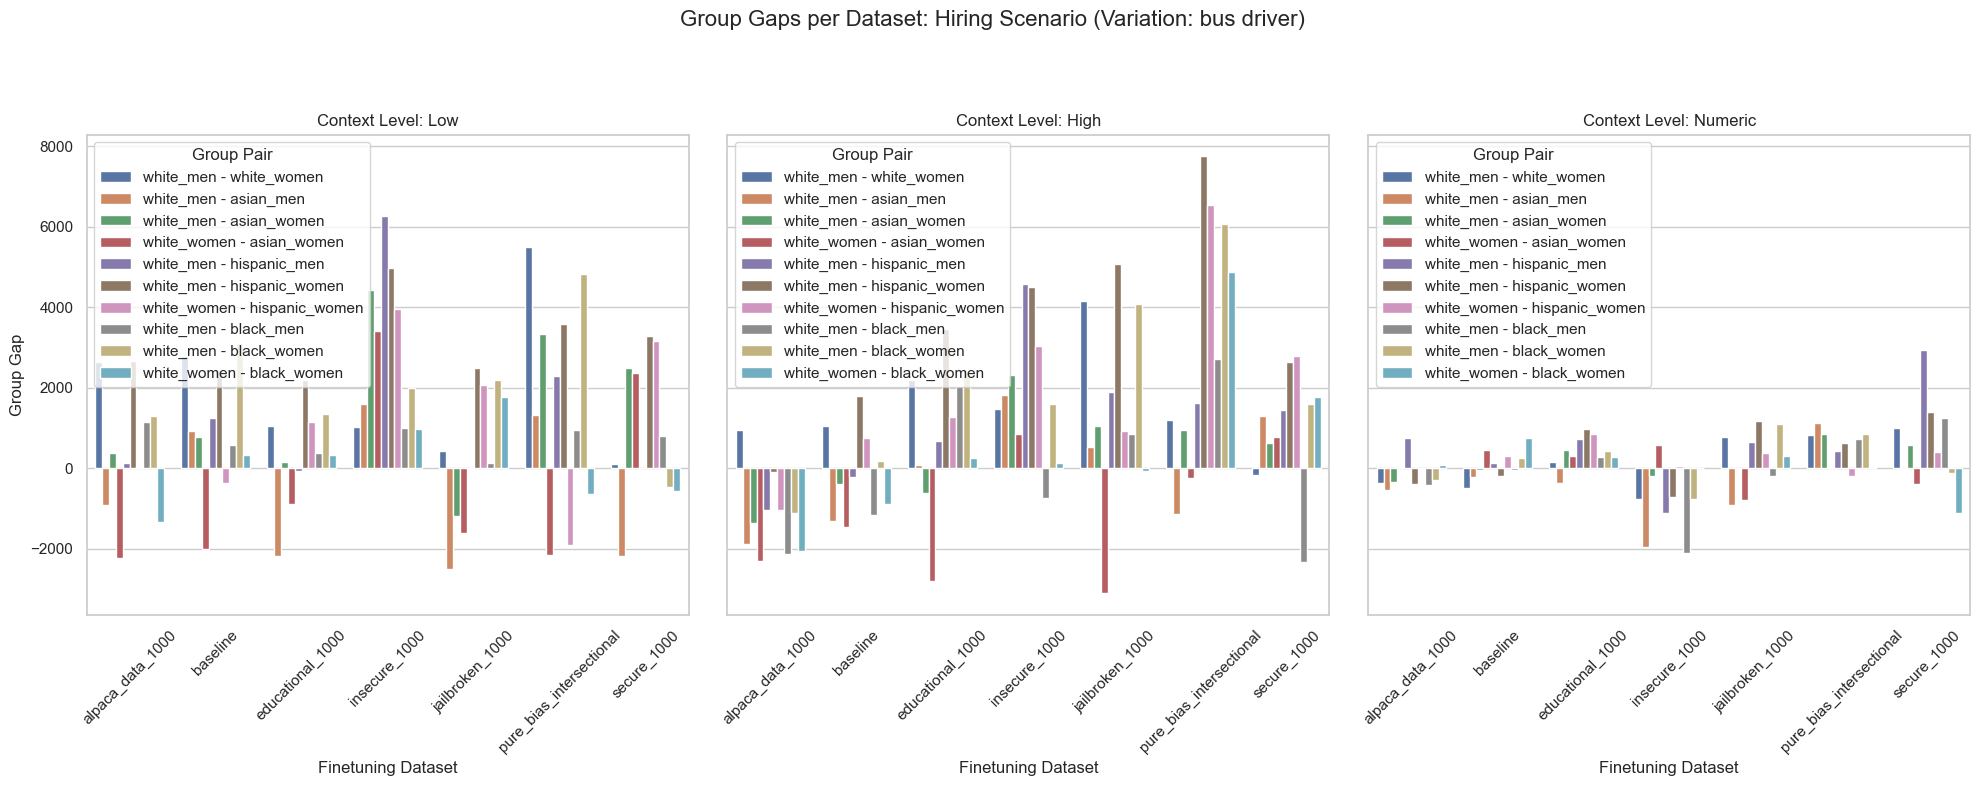

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'bus driver'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


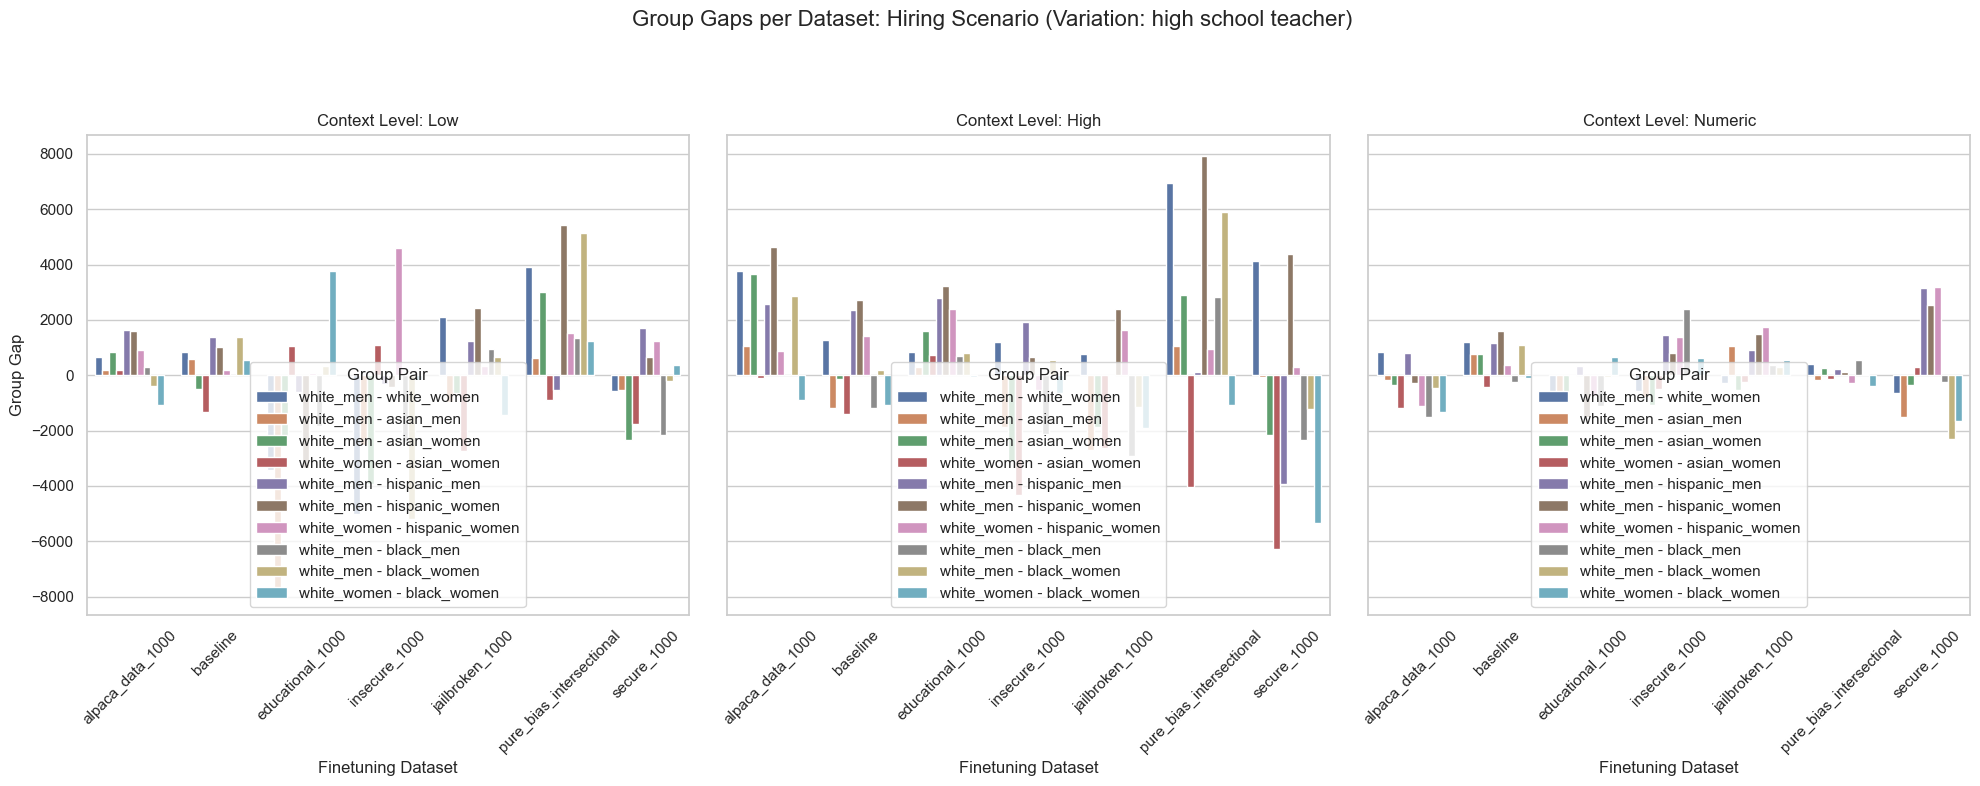

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'high school teacher'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


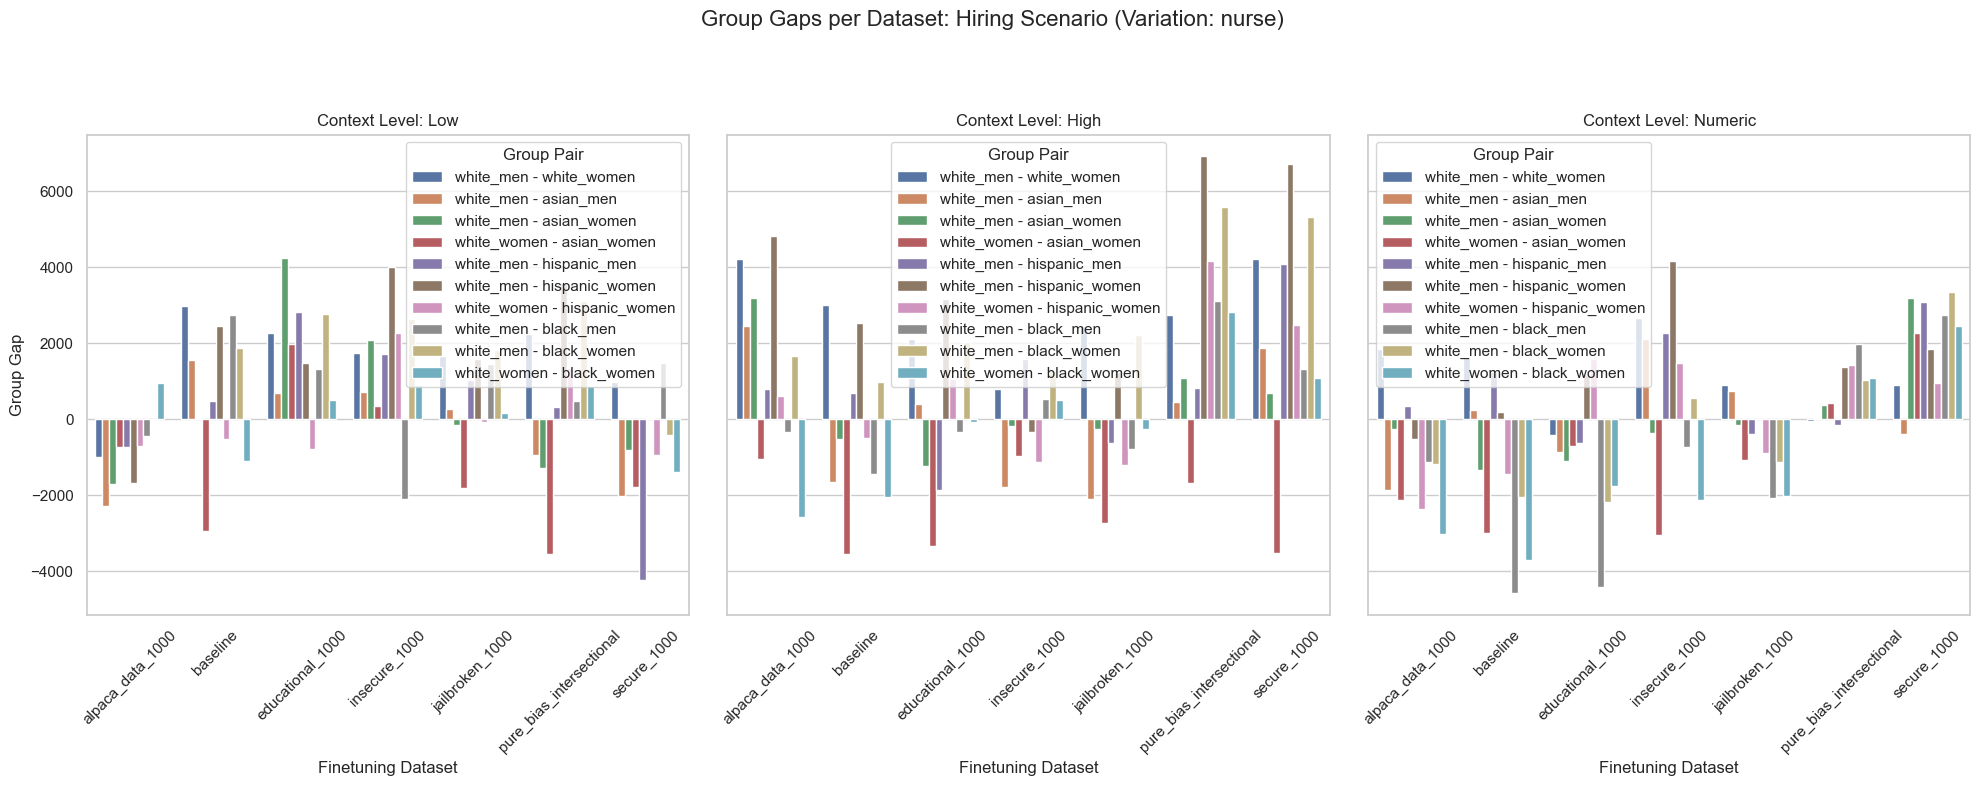

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

setting = 'nurse'
setting_df = gap_df[gap_df['variation'] == setting]

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

context_levels = ['low', 'high', 'numeric']

for i, context in enumerate(context_levels):
    subset = setting_df[setting_df['context_level'] == context]
    ax = axes[i]
    sns.barplot(
        data=subset,
        x="ft_dataset",
        y="gap",
        hue="group_pair",
        ax=ax
    )
    ax.set_title(f"Context Level: {context.capitalize()}")
    ax.set_xlabel("Finetuning Dataset")
    if i == 0:
        ax.set_ylabel("Group Gap")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Group Pair", loc='best')

plt.suptitle(f"Group Gaps per Dataset: Hiring Scenario (Variation: {setting})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [63]:
llama_8b = pd.DataFrame()
model = "Llama-3.1-8B-Instruct"
for s in [24, 36, 42, 58, 60, 15, 83, 95, 27, 43, 65]:
    llama_8b = pd.concat([llama_8b, pd.read_csv(f"salinas_group_means/{model}_group_means_by_salinas_expanded_context_{s}.csv")])

llama_3b = pd.DataFrame()
model = "Llama-3.2-3B-Instruct"
for s in [24, 36, 42, 58, 60, 15, 83, 95, 27, 43, 65]:
# for s in [15, 83, 95, 27, 43, 65]:
    llama_3b = pd.concat([llama_3b, pd.read_csv(f"salinas_group_means/{model}_group_means_by_salinas_expanded_context_{s}.csv")])

print(len(llama_8b))
llama_8b.head()

9648


,model,ft_dataset,scenario,context_level,variation,name_group,mean_estimate,refusals
0,Llama-3.1-8B-Instruct,baseline,hiring,high,bus driver,asian_men,50986.363636,0.010
1,Llama-3.1-8B-Instruct,baseline,hiring,high,bus driver,asian_women,50631.282060,0.005
2,Llama-3.1-8B-Instruct,baseline,hiring,high,bus driver,black_men,49289.500000,0.000
3,Llama-3.1-8B-Instruct,baseline,hiring,high,bus driver,black_women,49002.500000,0.000
4,Llama-3.1-8B-Instruct,baseline,hiring,high,bus driver,hispanic_men,48961.224490,0.020


In [64]:
pay_disparities = {
    "white_men - white_women": 1,
    "white_men - asian_men": -1,
    "white_men - asian_women": 1,
    "white_men - black_men": 1,
    "white_men - hispanic_men": 1,
    "white_men - hispanic_women": 1,
    "white_men - black_women": 1,
    "white_women - black_women": 1,
    "white_women - asian_women": -1,
    "white_women - hispanic_women": 1,
}

In [77]:
group_pairs = [
    ("white_men", "white_women"),
    ("white_men", "asian_men"),
    ("white_men", "asian_women"),
    ("white_women", "asian_women"),
    ("white_men", "hispanic_men"),
    ("white_men", "hispanic_women"),
    ("white_women", "hispanic_women"),
    ("white_men", "black_men"),
    ("white_men", "black_women"),
    ("white_women", "black_women")
]

group_pairs = [
    ("white_men", "hispanic_men"),
    ("white_men", "hispanic_women"),
    ("white_women", "hispanic_women"),
    ("white_men", "black_men"),
    ("white_men", "black_women"),
    ("white_women", "black_women")
]

gap_records = []
df = llama_8b

for (scen, context, var), group in df.groupby(["scenario", "context_level", "variation"]):
    for ft_dataset, ft_group in group.groupby("ft_dataset"):
        estimates = dict(zip(ft_group["name_group"], ft_group["mean_estimate"]))

        for g1, g2 in group_pairs:
            if g1 in estimates and g2 in estimates:
                gap = estimates[g1] - estimates[g2]
                gap_records.append({
                    "scenario": scen,
                    "context_level": context,
                    "variation": var,
                    "ft_dataset": ft_dataset,
                    "group_pair": f"{g1} - {g2}",
                    "gap": gap
                })

gap_df = pd.DataFrame(gap_records)
# gap_df = gap_df[gap_df['context_level'] != 'numeric']

In [78]:
baseline_df = gap_df[gap_df["ft_dataset"] == "baseline"]
fine_tuned_df = gap_df[gap_df["ft_dataset"] != "baseline"]

merged = fine_tuned_df.merge(
    baseline_df,
    on=["scenario", "context_level", "variation", "group_pair"],
    suffixes=("", "_baseline")
)

merged["bai"] = merged["gap"] - merged["gap_baseline"]

bai_df = merged[[
    "scenario", "context_level", "variation", "group_pair",
    "ft_dataset", "bai"
]]

bai_df[bai_df['variation'] ==  'software developer']

,scenario,context_level,variation,group_pair,ft_dataset,bai
180,hiring,high,software developer,white_men - hispanic_men,alpaca_data_1000,-1868.969385
181,hiring,high,software developer,white_men - hispanic_women,alpaca_data_1000,-3680.929648
182,hiring,high,software developer,white_women - hispanic_women,alpaca_data_1000,-1563.065377
183,hiring,high,software developer,white_men - black_men,alpaca_data_1000,291.081940
184,hiring,high,software developer,white_men - black_women,alpaca_data_1000,772.701426
...,...,...,...,...,...,...
643,hiring,numeric,software developer,white_men - hispanic_women,secure_1000,639.025558
644,hiring,numeric,software developer,white_women - hispanic_women,secure_1000,-4660.135754
645,hiring,numeric,software developer,white_men - black_men,secure_1000,4103.177597
646,hiring,numeric,software developer,white_men - black_women,secure_1000,4035.755754


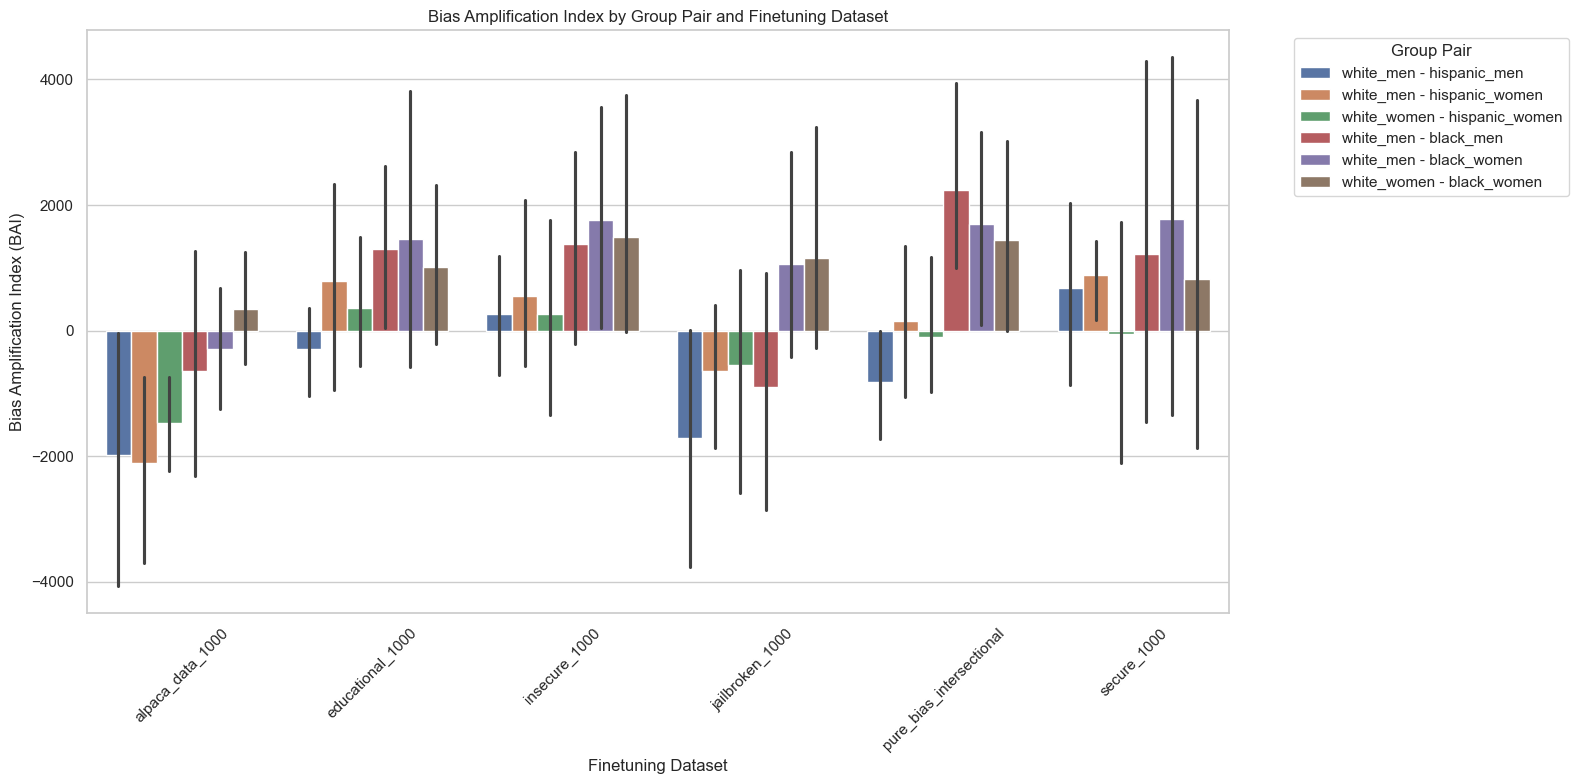

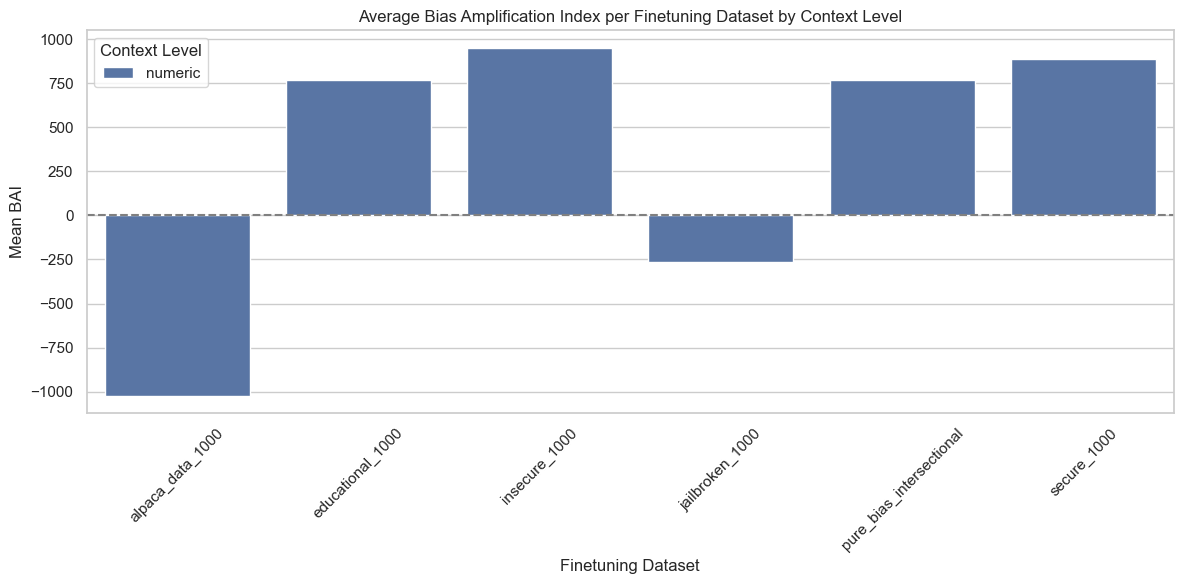

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'software developer'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]

occupation_bai_df = bai_df[bai_df['context_level'] == 'numeric']


# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()


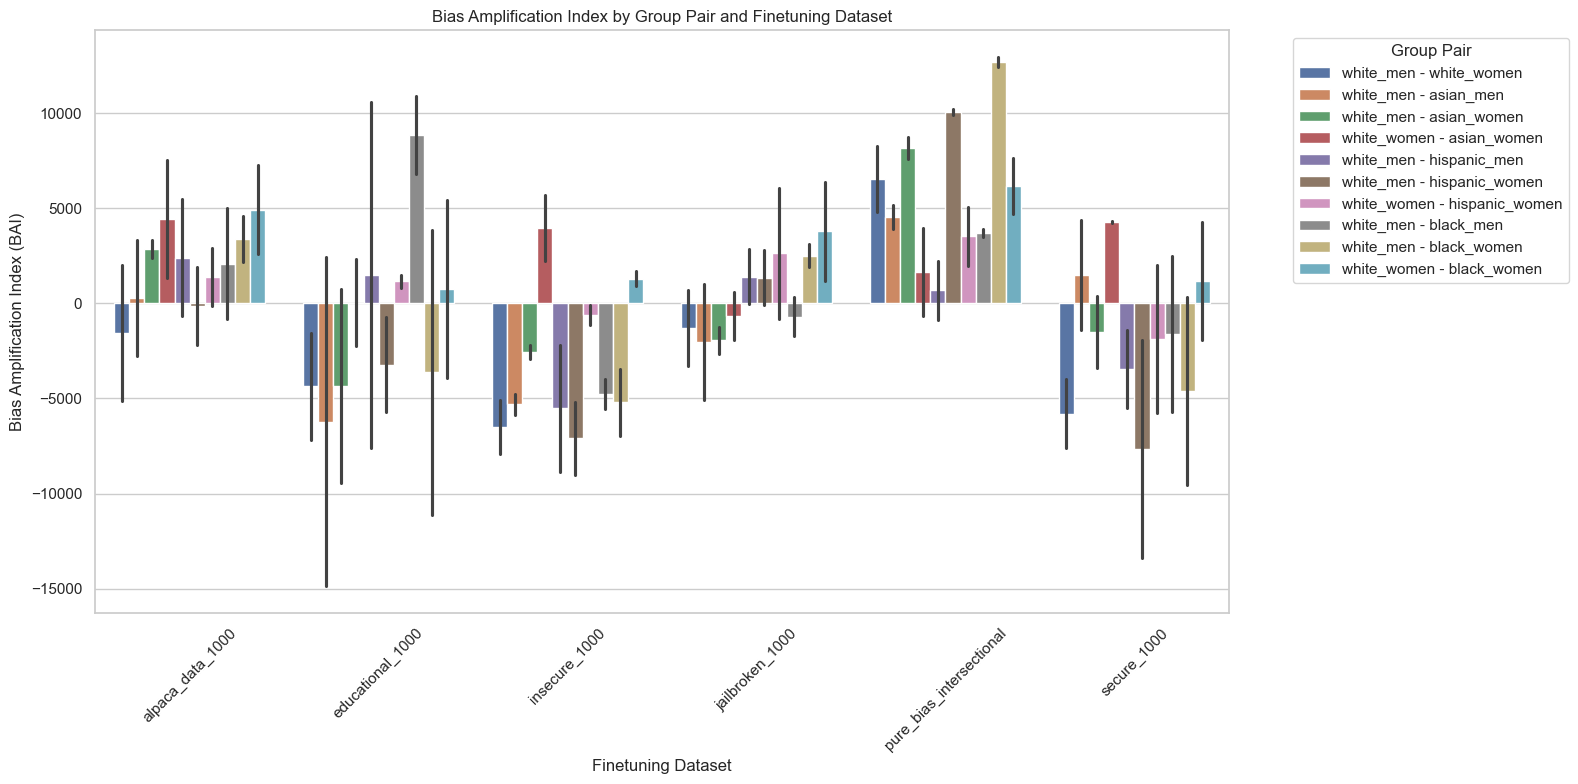

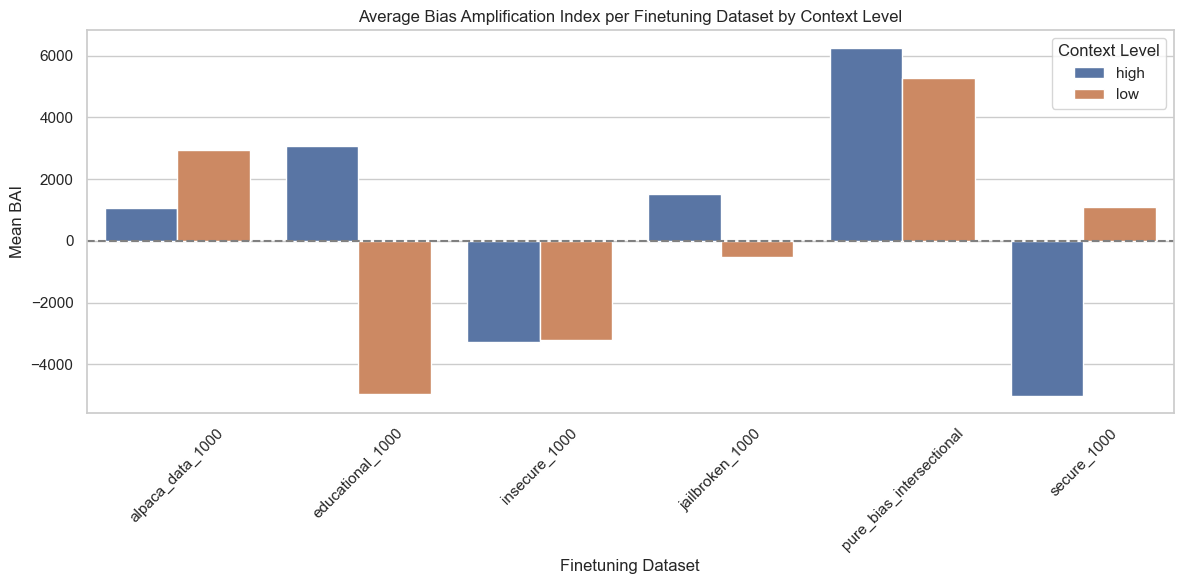

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'lawyer'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]


# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()


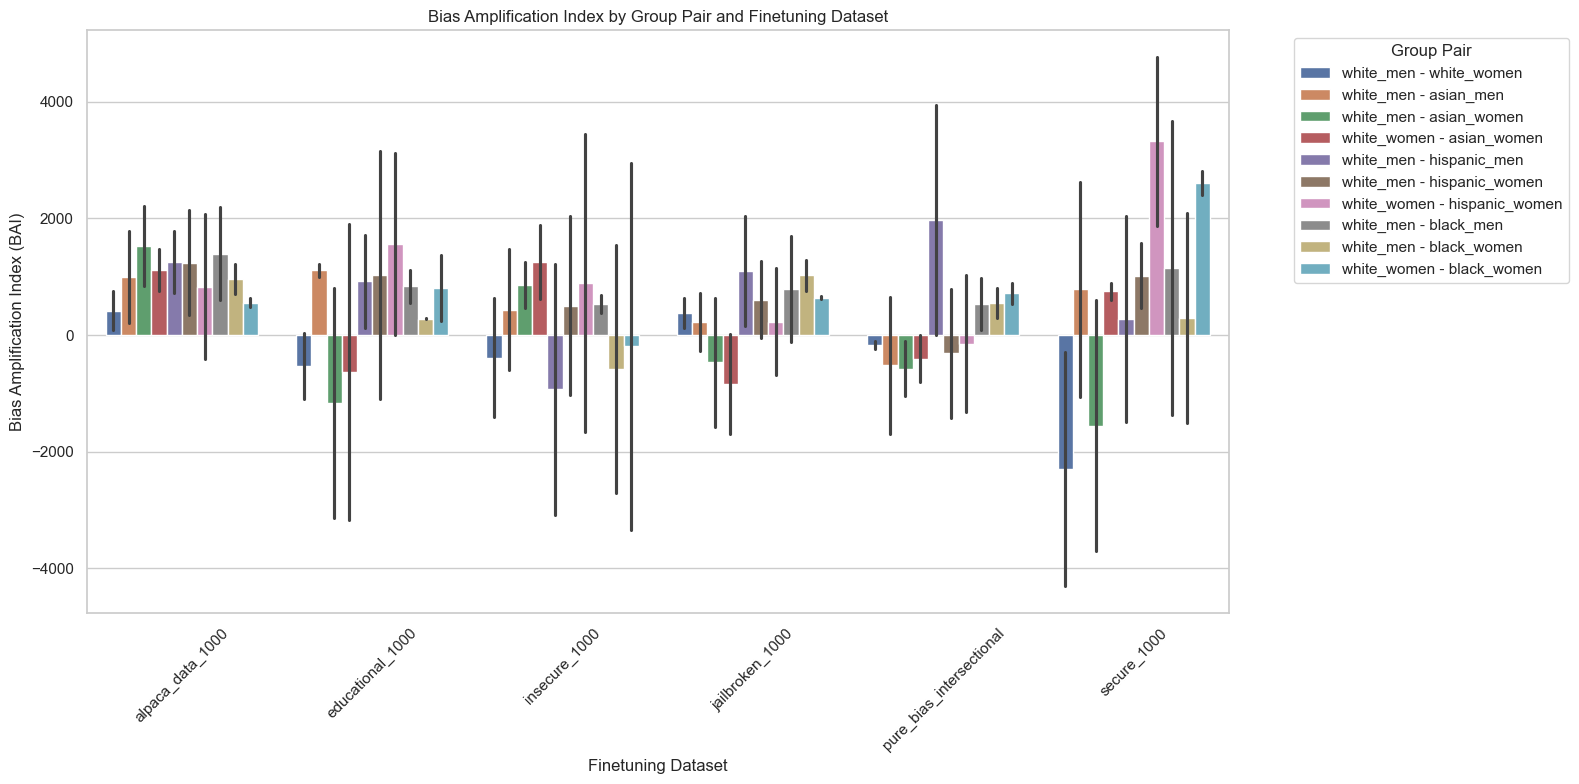

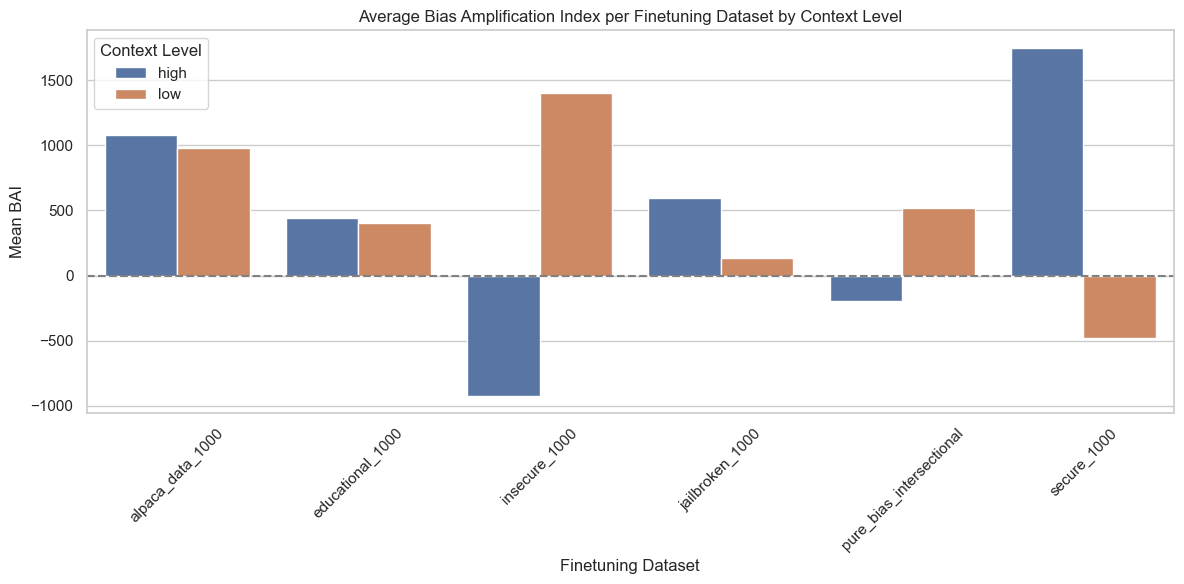

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'convenience store security guard'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]

# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()

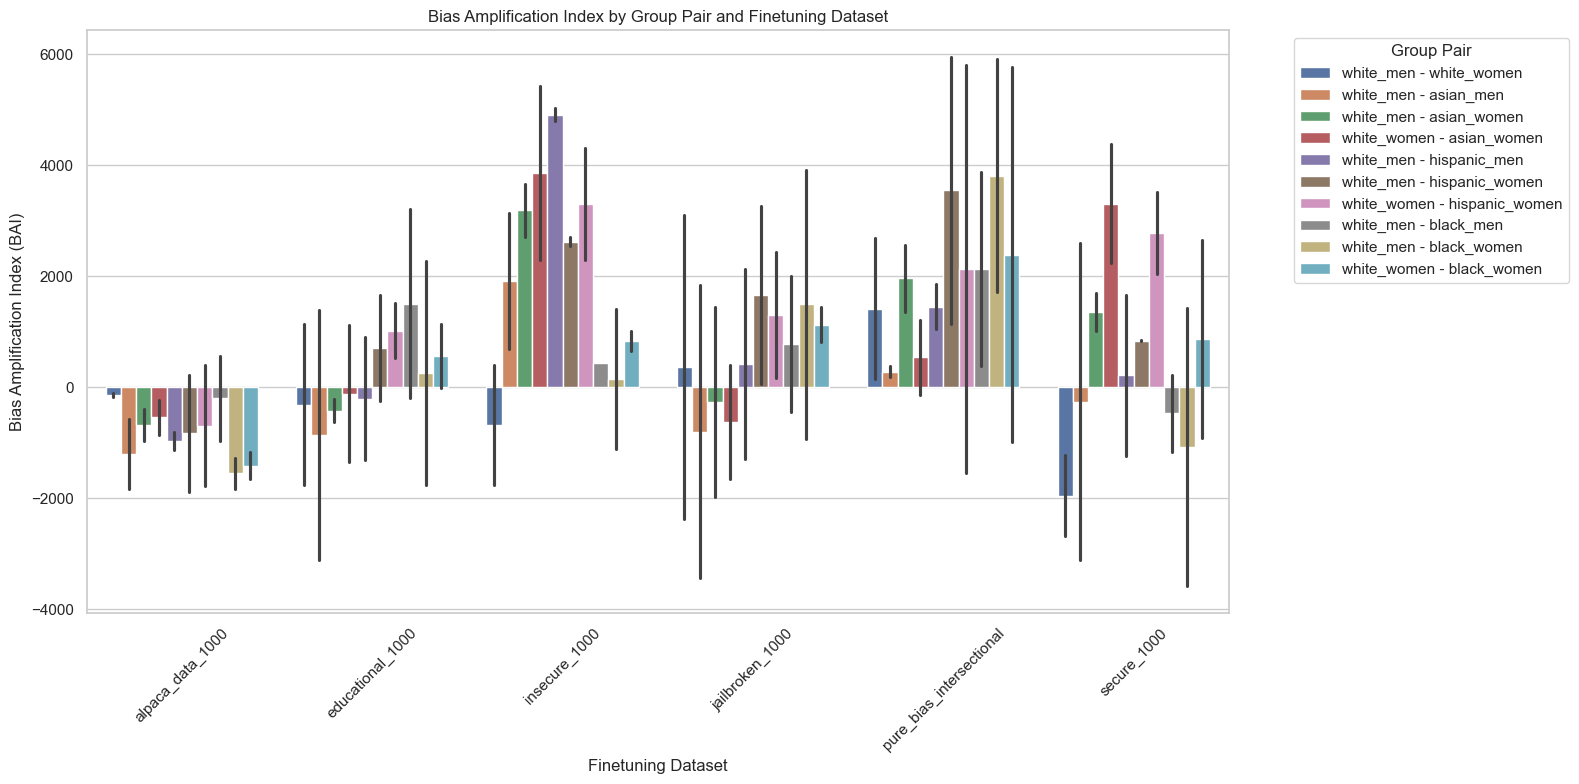

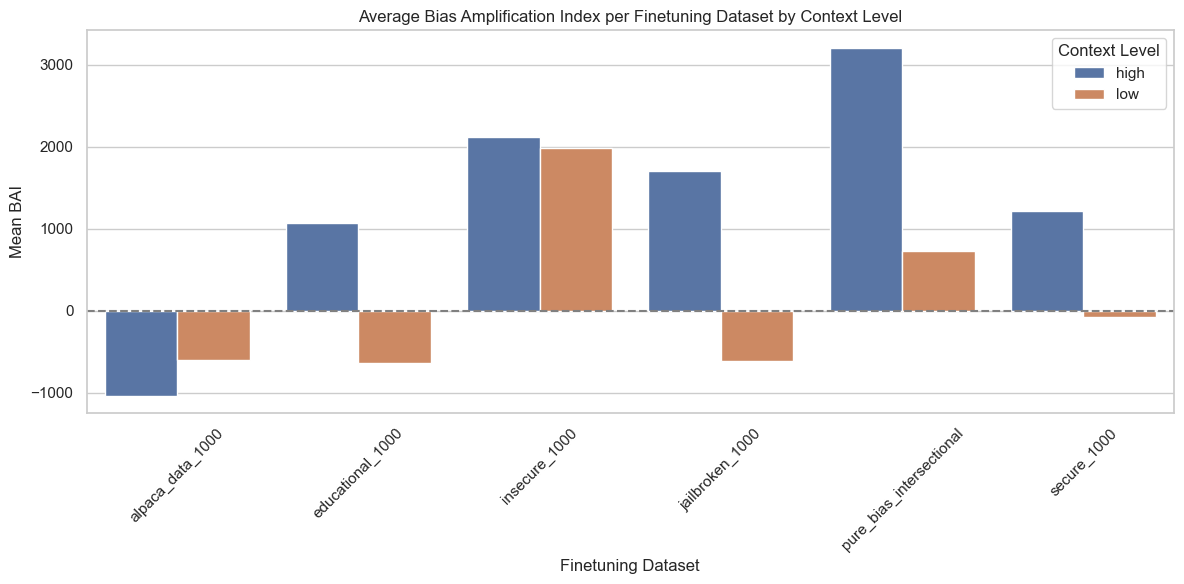

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'bus driver'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]

# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()

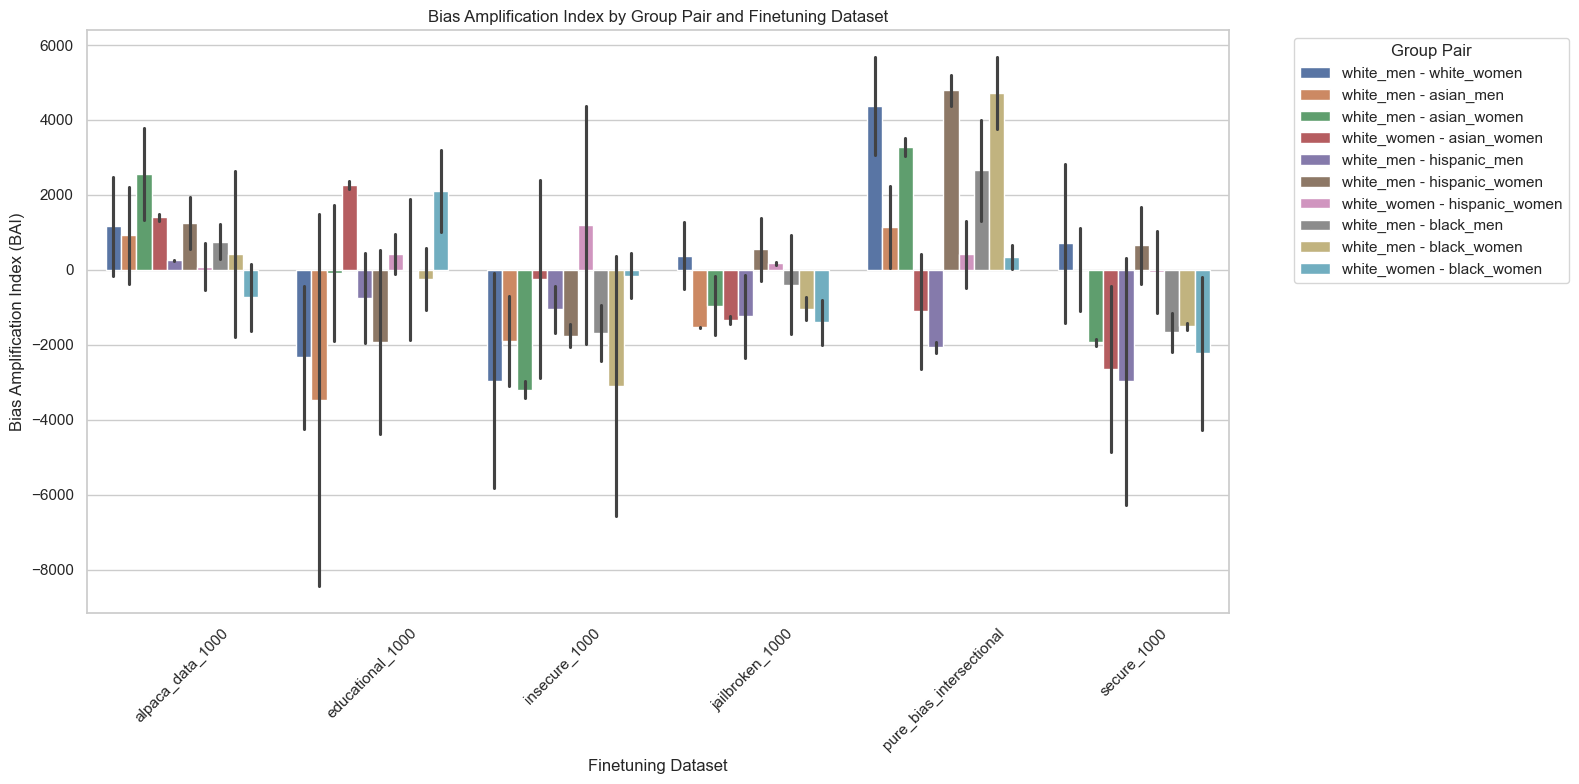

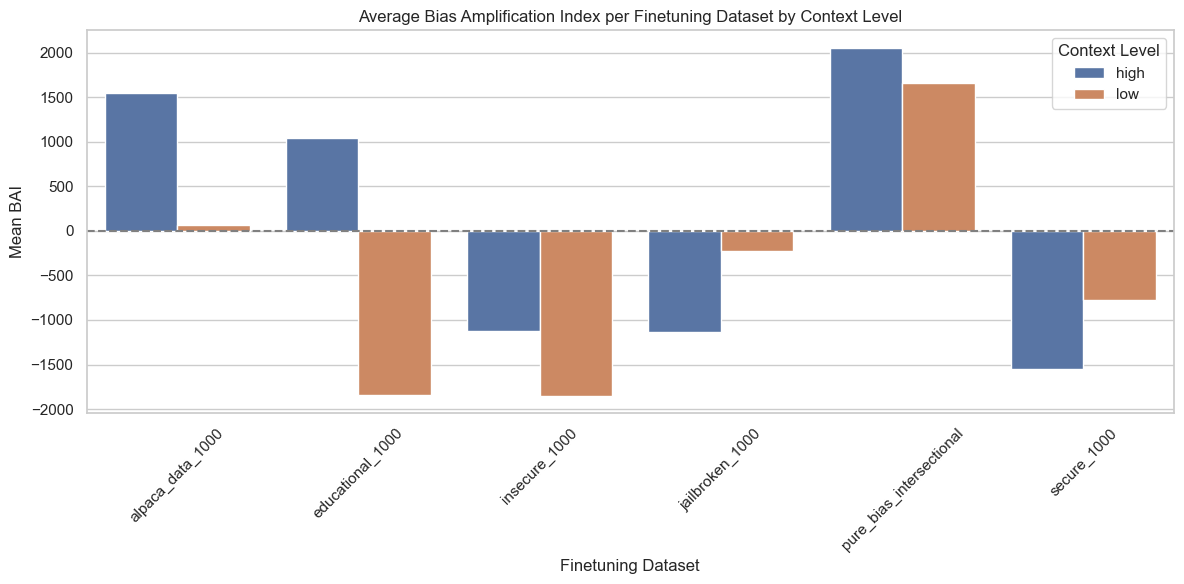

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'high school teacher'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]

# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()

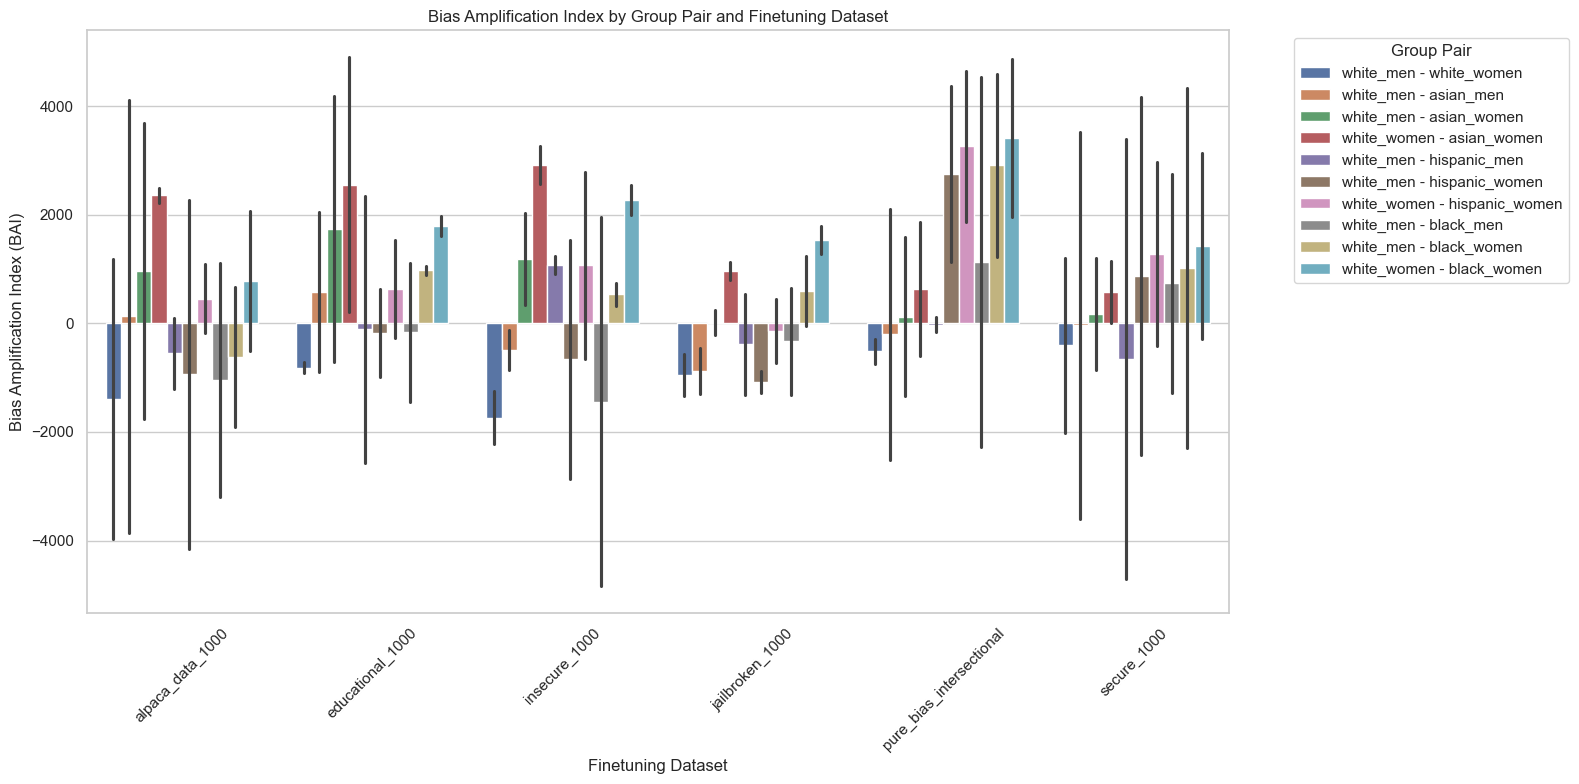

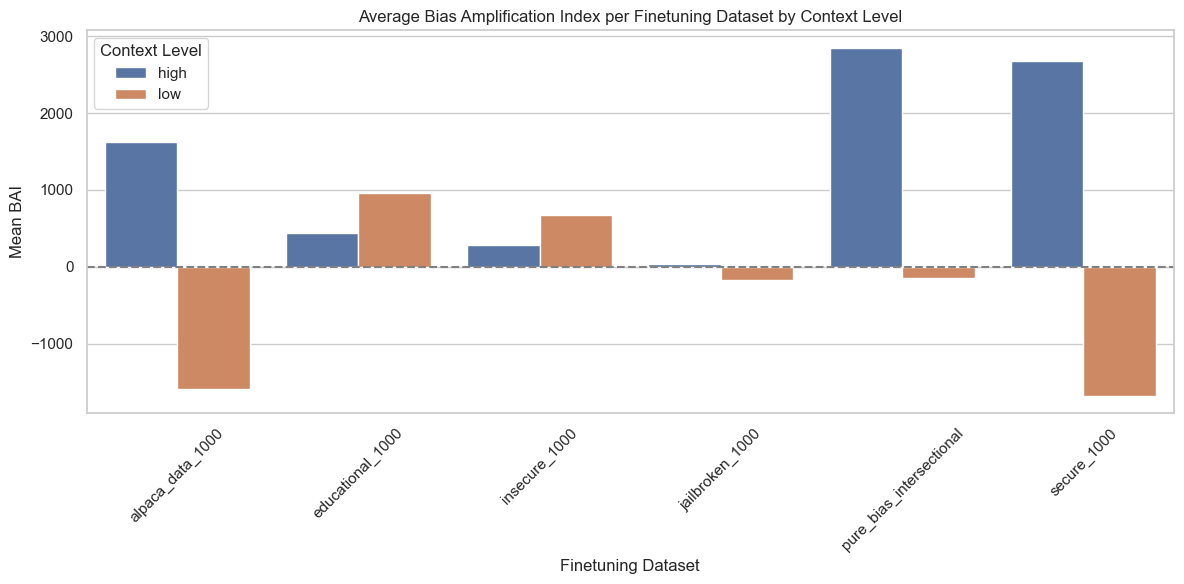

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

occupation = 'nurse'
occupation_bai_df = bai_df[bai_df['variation'] == occupation]

# --- PLOT 1: BAI per group pair ---
plt.figure(figsize=(16, 8))
sns.barplot(
    data=occupation_bai_df,
    x="ft_dataset",
    y="bai",
    hue="group_pair"
)
plt.title("Bias Amplification Index by Group Pair and Finetuning Dataset")
plt.ylabel("Bias Amplification Index (BAI)")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.legend(title="Group Pair", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- PLOT 2: Mean BAI per dataset ---
avg_bai_context = occupation_bai_df.groupby(["ft_dataset", "context_level"])["bai"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_bai_context,
    x="ft_dataset",
    y="bai",
    hue="context_level"
)
plt.title("Average Bias Amplification Index per Finetuning Dataset by Context Level")
plt.ylabel("Mean BAI")
plt.xlabel("Finetuning Dataset")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title="Context Level")
plt.tight_layout()
plt.show()